# Nasa - Asteroids classification

Esse notebook faz parte do trabalho da disciplina de Arquitetura de dados, ministrado pelo Prof. Dr. Dieval Guizelini, do curso de Pós Graduação em Inteligência Artificial Aplicada da UFPR.

O objetivo é aplicar técnicas de pré processamento de dados com a finalidade de melhorar a primeira classificação feita sem tais técnicas.

Usaremos a base de classificação de asteróides presente em: https://www.kaggle.com/shrutimehta/nasa-asteroids-classification.

**Alunos:** Luiza R. Marinho e Tiago J. da Silva

---

## 1. Para começar

### Lendo a nossa base

In [123]:
import pandas as pd

In [124]:
asteroides_df = pd.read_csv('nasa-asteroides-database.csv', sep = ',', engine = 'python')

In [125]:
asteroides_df.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762               0.202951            479.225620  ...   
2               0.143849               0.321655            759.521423  ...   
3               0.005469               0.012229             28.876199  ...   
4               0.079051               0.176763            417.388066  ...   

   Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
0          314.373913     609.599786             0.808259       57.257470   
1          136.717242     425.869294             0.718200      313.091975   
2          259.475979     643.580228             0.950791      248.415038   
3           57.173266     514.082140             0.983902       18.707701   
4           84.629307     495.597821             0.967687      158.263596   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0       2.005764     2.458162e+06    264.837533     0.590551    J2000   
1       1.497352     2.457795e+06    173.741112     0.845330    J2000   
2       1.966857     2.458120e+06    292.893654     0.559371    J2000   
3       1.527904     2.457902e+06     68.741007     0.700277    J2000   
4       1.483543     2.457814e+06    135.142133     0.726395    J2000   

   Hazardous  
0       True  
1      False  
2       True  
3      False  
4       True  

[5 rows x 40 columns]

In [126]:
print(asteroides_df.iloc[1])

Neo Reference ID                            3723955
Name                                        3723955
Absolute Magnitude                             21.3
Est Dia in KM(min)                         0.146068
Est Dia in KM(max)                         0.326618
Est Dia in M(min)                        146.067964
Est Dia in M(max)                        326.617897
Est Dia in Miles(min)                      0.090762
Est Dia in Miles(max)                      0.202951
Est Dia in Feet(min)                      479.22562
Est Dia in Feet(max)                    1071.581063
Close Approach Date                      1995-01-01
Epoch Date Close Approach              788947200000
Relative Velocity km per sec              18.113985
Relative Velocity km per hr            65210.346095
Miles per hour                         40519.173105
Miss Dist.(Astronomical)                   0.383014
Miss Dist.(lunar)                         148.99263
Miss Dist.(kilometers)                   57298148.0
Miss Dist.(m

In [ ]:
dict = [
    {
        'field': 'Neo Reference ID',
        'meaning': 'Identificador do NEO (Next Earth Object)'
    },
    {
        'field': 'Name',
        'meaning': 'Réplica do Neo Reference ID'
    },
    {
        'field': 'Absolute Magnitude',
        'meaning': 'Magnitude absoluta'
    },
    {
        'field': 'Est Dia in KM(min)',
        'meaning': 'Menor diâmetro estimado em Quilômetros'
    },
    {
        'field': 'Est Dia in KM(max)',
        'meaning': 'Maior diâmetro estimado em Quilômetros'
    },
    {
        'field': 'Est Dia in M(min)',
        'meaning': 'Menor diâmetro estimado em Metros'
    },
    {
        'field': 'Est Dia in M(max)',
        'meaning': 'Maior diâmetro estimado em Metros'
    },
    {
        'field': 'Est Dia in Miles(min)',
        'meaning': 'Menor diâmetro estimado em Milhas'
    },
    {
        'field': 'Est Dia in Miles(max)',
        'meaning': 'Maior diâmetro estimado em Milhas'
    },
    {
        'field': 'Est Dia in Feet(min)',
        'meaning': 'Menor diâmetro estimado em Pés'
    },
    {
        'field': 'Est Dia in Feet(max)',
        'meaning': 'Maior diâmetro estimado em Pés.'
    },
    {
        'field': 'Close Approach Date',
        'meaning': 'Data de aproximação'
    },
    {
        'field': 'Epoch Date Close Approach',
        'meaning': 'Data de aproximação em Milissegundos'
    },
    {
        'field': 'Relative Velocity km per sec',
        'meaning': 'Velocidade em Quilômetros por Segundo'
    },
    {
        'field': 'Relative Velocity km per hr',
        'meaning': 'Velocidade em Quilômetros por Hora'
    },
    {
        'field': 'Miles per hour',
        'meaning': 'Velocidade em Milhas por Hora'
    },
    {
        'field': 'Miss Dist.(Astronomical)',
        'meaning': 'Miss Distance em Unidade Astronômica'
    },
    {
        'field': 'Miss Dist.(lunar)',
        'meaning': 'Miss Distance em Distância Lunar'
    },
    {
        'field': 'Miss Dist.(kilometers)',
        'meaning': 'Miss Distance em Quilômetros'
    },
    {
        'field': 'Miss Dist.(miles)',
        'meaning': 'Miss Distance em Milhas'
    },
    {
        'field': 'Orbiting Body',
        'meaning': 'O corpo orbitado pelo NEO'
    },
    {
        'field': 'Orbit ID',
        'meaning': 'Id da órbita'
    },
    {
        'field': 'Orbit Determination Date',
        'meaning': 'Data da determinação da órbita'
    },
    {
        'field': 'Orbit Uncertainity',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Minimum Orbit Intersection',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Jupiter Tisserand Invariant',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Epoch Osculation',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Eccentricity',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Semi Major Axis',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Inclination',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Asc Node Longitude',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Orbital Period',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Perihelion Distance',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Perihelion Arg',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Aphelion Dist',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Perihelion Time',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Mean Anomaly',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Mean Motion',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Equinox',
        'meaning': 'Dado sobre a órbita'
    },
    {
        'field': 'Hazardous',
        'meaning': 'Risco de colisão?'
    }
]

### Algumas estatísticas

In [127]:
asteroides_df.describe()

Neo Reference ID          Name  Absolute Magnitude  Est Dia in KM(min)  \
count      4.687000e+03  4.687000e+03         4687.000000         4687.000000   
mean       3.272298e+06  3.272298e+06           22.267865            0.204604   
std        5.486011e+05  5.486011e+05            2.890972            0.369573   
min        2.000433e+06  2.000433e+06           11.160000            0.001011   
25%        3.097594e+06  3.097594e+06           20.100000            0.033462   
50%        3.514799e+06  3.514799e+06           21.900000            0.110804   
75%        3.690060e+06  3.690060e+06           24.500000            0.253837   
max        3.781897e+06  3.781897e+06           32.100000           15.579552   

       Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
count         4687.000000        4687.000000        4687.000000   
mean             0.457509         204.604203         457.508906   
std              0.826391         369.573402         826.391249   
min              0.002260           1.010543           2.259644   
25%              0.074824          33.462237          74.823838   
50%              0.247765         110.803882         247.765013   
75%              0.567597         253.837029         567.596853   
max             34.836938       15579.552413       34836.938254   

       Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
count            4687.000000            4687.000000           4687.000000   
mean                0.127135               0.284283            671.273653   
std                 0.229642               0.513496           1212.511199   
min                 0.000628               0.001404              3.315431   
25%                 0.020792               0.046493            109.784247   
50%                 0.068850               0.153954            363.529809   
75%                 0.157727               0.352688            832.798679   
max                 9.680682              21.646663          51114.018738   

       ...  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
count  ...      4687.000000  4687.000000         4687.000000     4687.000000   
mean   ...         1.400264    13.373844          172.157275      635.582076   
std    ...         0.524154    10.936227          103.276777      370.954727   
min    ...         0.615920     0.014513            0.001941      176.557161   
25%    ...         1.000635     4.962341           83.081208      365.605031   
50%    ...         1.240981    10.311836          172.625393      504.947292   
75%    ...         1.678364    19.511681          255.026909      794.195972   
max    ...         5.072008    75.406667          359.905890     4172.231343   

       Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  \
count          4687.000000     4687.000000    4687.000000     4.687000e+03   
mean              0.813383      183.932151       1.987144     2.457728e+06   
std               0.242059      103.513035       0.951519     9.442264e+02   
min               0.080744        0.006918       0.803765     2.450100e+06   
25%               0.630834       95.625916       1.266059     2.457815e+06   
50%               0.833153      189.761641       1.618195     2.457973e+06   
75%               0.997227      271.777557       2.451171     2.458108e+06   
max               1.299832      359.993098       8.983852     2.458839e+06   

       Mean Anomaly  Mean Motion  
count   4687.000000  4687.000000  
mean     181.167927     0.738242  
std      107.501623     0.342627  
min        0.003191     0.086285  
25%       87.006918     0.453289  
50%      185.718889     0.712946  
75%      276.531946     0.984669  
max      359.917991     2.039000  

[8 rows x 35 columns]

### Relação entre atributos

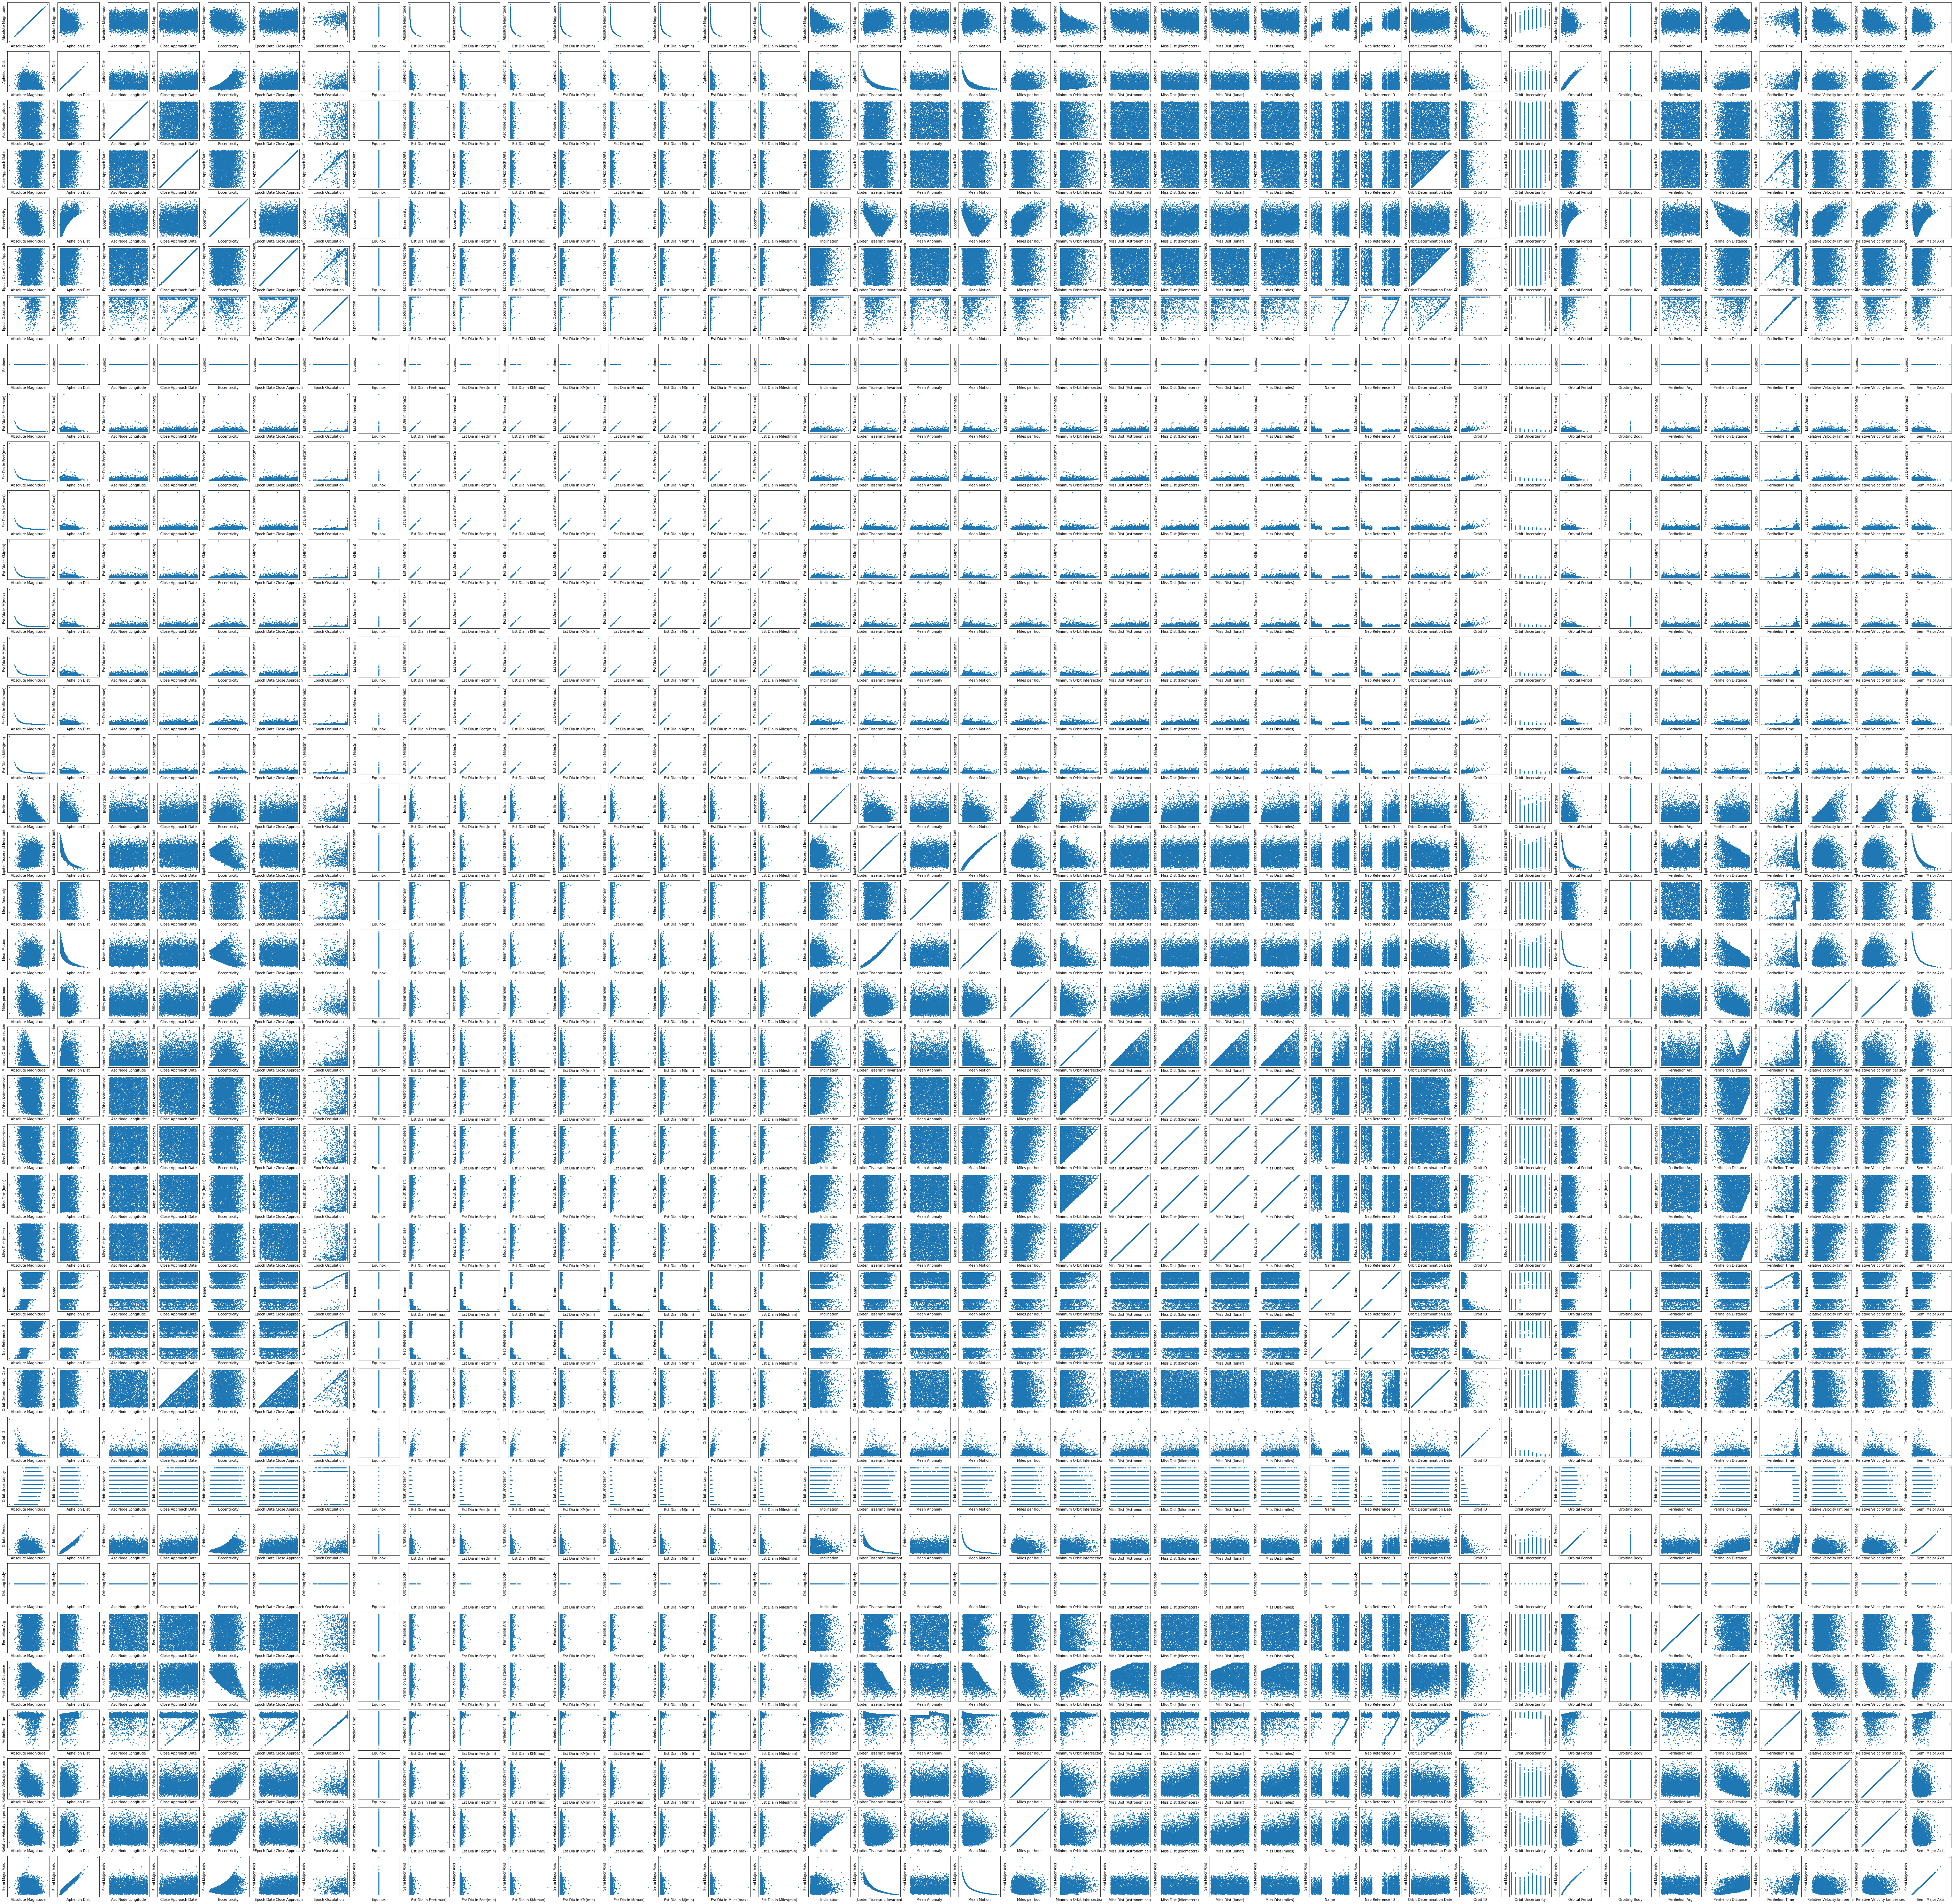

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
colunas = list(asteroides_df.head())
colunas = colunas[0:-1]
nomeColunas = sorted(colunas) 
numColunas = len(nomeColunas)
fig, ax = plt.subplots(numColunas, numColunas, figsize=(100, 100), constrained_layout = False)
for lin in range(0, numColunas):
    for col in range(0,numColunas): 
        ax[lin,col].scatter(x = asteroides_df[nomeColunas[col]], y = asteroides_df[nomeColunas[lin]],s = 4) 
        ax[lin,col].set(xticks = [], yticks = [], xlabel = nomeColunas[col], 
        ylabel = nomeColunas[lin])
plt.show()

/opt/anaconda3/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


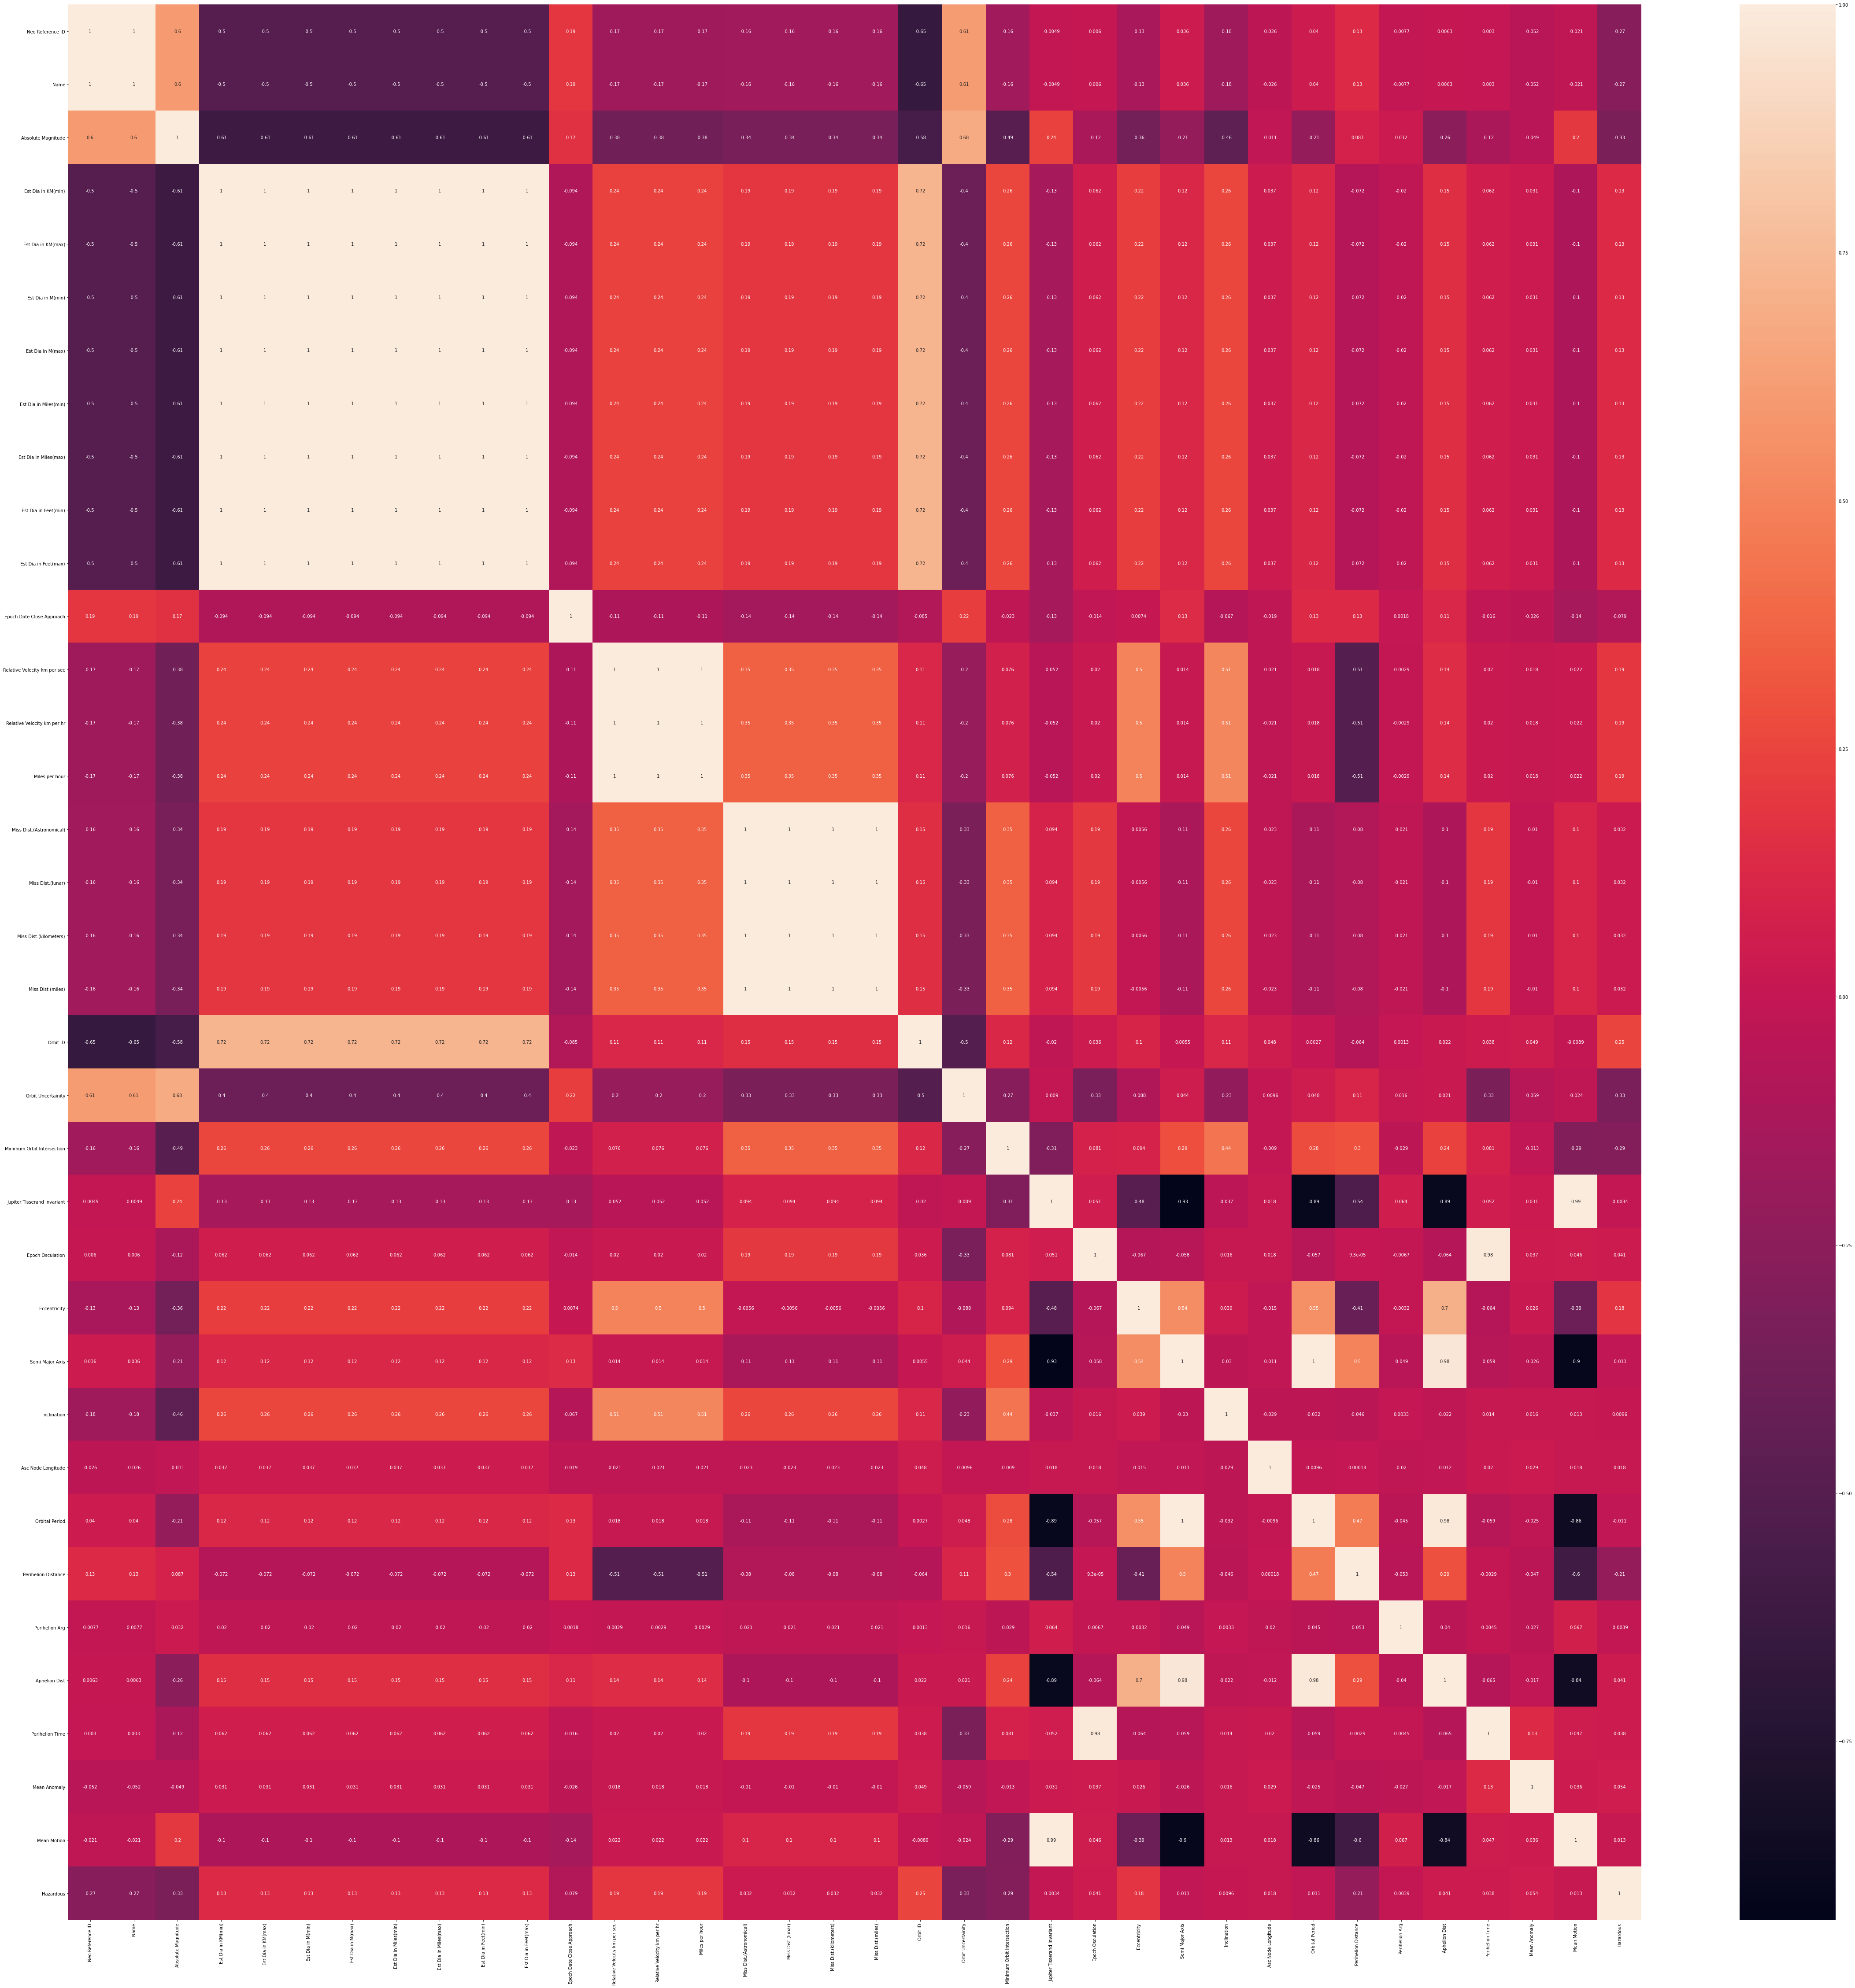

In [130]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1) 
corr = asteroides_df.corr()

plt.subplots(figsize=(80, 80)) 
sn.heatmap(corr, annot = True) 
plt.show()

### Primeira classificação: Antes do pré processamento

#### Preparando os dados para a primeira classificação

Antes de gerarmos o classificador precisamos adaptar minimamente os dados pois a classificador que usaremos, o SVM, aceita apenas números além da classe. No nosso dataframe temos dois campos categóricos além da classe: **Orbiting Body** e **Equinox**. Além deles há dois campos que armazenam datas: **Orbit Determination Date** e **Close Approach Date**.

Para solucionar isso iremos:

- Remover os campos de data
- Converter os valores categórios em valores numéricos.

##### Removendo os campos de data

In [163]:
asteroides_df.drop('Orbit Determination Date', 1, inplace = True)
asteroides_df.drop('Close Approach Date', 1, inplace = True)

##### Convertendo os valores categóricos em valores numéricos

In [164]:
orbiting_body_factor = pd.factorize(asteroides_df['Orbiting Body'])
equinox_factor = pd.factorize(asteroides_df['Equinox'])

In [165]:
asteroides_df['Orbiting Body'] = orbiting_body_factor[0]
asteroides_df['Equinox'] = equinox_factor[0]

In [131]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### Separando os dados de Treino e Teste

Cria X e y onde **X** é o conjunto de dados sem a classe e **y** é o conjunto de classes.

In [166]:
X = asteroides_df.iloc[:,:-1]
y = asteroides_df.iloc[:,-1]

Separando massas de Treino (X_train e y_train) e de Teste (X_test e y_test)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### Gerando o classificador e executando a predição

In [168]:
clf = svm.SVC()

In [169]:
clf.fit(X_train, y_train)

SVC()

In [170]:
predicted = clf.predict(X_test)

#### Analisando os resultados

##### Matriz de confusão

In [199]:
cm = confusion_matrix(y_test, predicted)

<AxesSubplot:xlabel='Predito', ylabel='Esperado'>

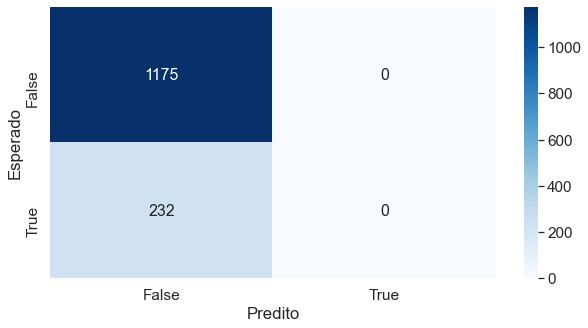

In [198]:
import numpy as np

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Esperado'
df_cm.columns.name = 'Predito'
plt.figure(figsize = (10,5))
sn.set(font_scale = 1.4)
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

##### Report classification

In [211]:
print(metrics.classification_report(y_test,predicted, zero_division = False))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1175
        True       0.00      0.00      0.00       232

    accuracy                           0.84      1407
   macro avg       0.42      0.50      0.46      1407
weighted avg       0.70      0.84      0.76      1407



##### Acurácia

In [212]:
np.mean(predicted == y_test)

0.8351101634683724